In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data siswa depresi.csv')
df = pd.DataFrame(data)
df.drop(columns=['id'], inplace=True)
df

(27898, 17)

In [3]:
# pembuatan variabel dn untuk data numerik
dn = df.copy() # copy dari variable df
dn.head()

,Jenis Kelamin,Usia,Kota,profesi,Tekanan Akademik,Tekanan Kerja,IPK,Kepuasan Belajar,Kepuasan Kerja,Durasi Tidur,Kebiasaan Makan,Gelar Pendidikan,Apakah anda pernah memiliki pikiran untuk bunuh diri,Jam Kerja/Belajar,Tingkat Stress Keuangan,Riwayat Penyakit Mental Dalam Keluarga,Depresi
0,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# mengumpulkan apa saja nama kolom dengan type kategorikal
kategorikal = ['Jenis Kelamin', 'Kota', 'Durasi Tidur', 'Kebiasaan Makan', 'Gelar Pendidikan', 'Apakah anda pernah memiliki pikiran untuk bunuh diri','Riwayat Penyakit Mental Dalam Keluarga']
kategorikal


['Jenis Kelamin',
 'Kota',
 'Durasi Tidur',
 'Kebiasaan Makan',
 'Gelar Pendidikan',
 'Apakah anda pernah memiliki pikiran untuk bunuh diri',
 'Riwayat Penyakit Mental Dalam Keluarga']

In [5]:
# Proses dimana data kategorikal diubah menjadi numerical agar prose efektif
label = LabelEncoder()
for col in dn.select_dtypes(include=['object']).columns: # menggunakan perulangan agar proses lebih cepat
    dn[col] = label.fit_transform(df[col])


In [9]:
# proses normalisasi pada data numerik
scaler = MinMaxScaler()
numerik = ['Usia','Jam Kerja/Belajar', 'IPK', 'Tekanan Kerja'] # hanya kolom numerik dan bukan bersifat ordinal yang dilakukan normalisasi
dn[numerik] = scaler.fit_transform(dn[numerik])
dn

,Jenis Kelamin,Usia,Kota,profesi,Tekanan Akademik,Tekanan Kerja,IPK,Kepuasan Belajar,Kepuasan Kerja,Durasi Tidur,Kebiasaan Makan,Gelar Pendidikan,Apakah anda pernah memiliki pikiran untuk bunuh diri,Jam Kerja/Belajar,Tingkat Stress Keuangan,Riwayat Penyakit Mental Dalam Keluarga,Depresi
0,1,0.365854,51,11,5.0,0.0,0.897,2.0,0.0,0,0,3,1,0.250000,1.0,0,1
1,0,0.146341,3,11,2.0,0.0,0.590,5.0,0.0,0,1,10,0,0.250000,2.0,1,0
2,1,0.317073,44,11,3.0,0.0,0.703,5.0,0.0,2,0,5,0,0.750000,1.0,1,0
3,0,0.243902,49,11,3.0,0.0,0.559,2.0,0.0,1,1,7,1,0.333333,5.0,1,1
4,0,0.170732,16,11,4.0,0.0,0.813,3.0,0.0,0,1,17,1,0.083333,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27893,0,0.219512,45,11,5.0,0.0,0.575,5.0,0.0,0,3,11,1,0.583333,1.0,1,0
27894,1,0.219512,25,11,2.0,0.0,0.940,3.0,0.0,2,0,25,0,0.000000,3.0,1,0
27895,1,0.317073,9,11,3.0,0.0,0.661,4.0,0.0,0,3,22,0,1.000000,2.0,0,0
27896,0,0.000000,25,11,5.0,0.0,0.688,2.0,0.0,2,0,11,1,0.833333,5.0,0,1


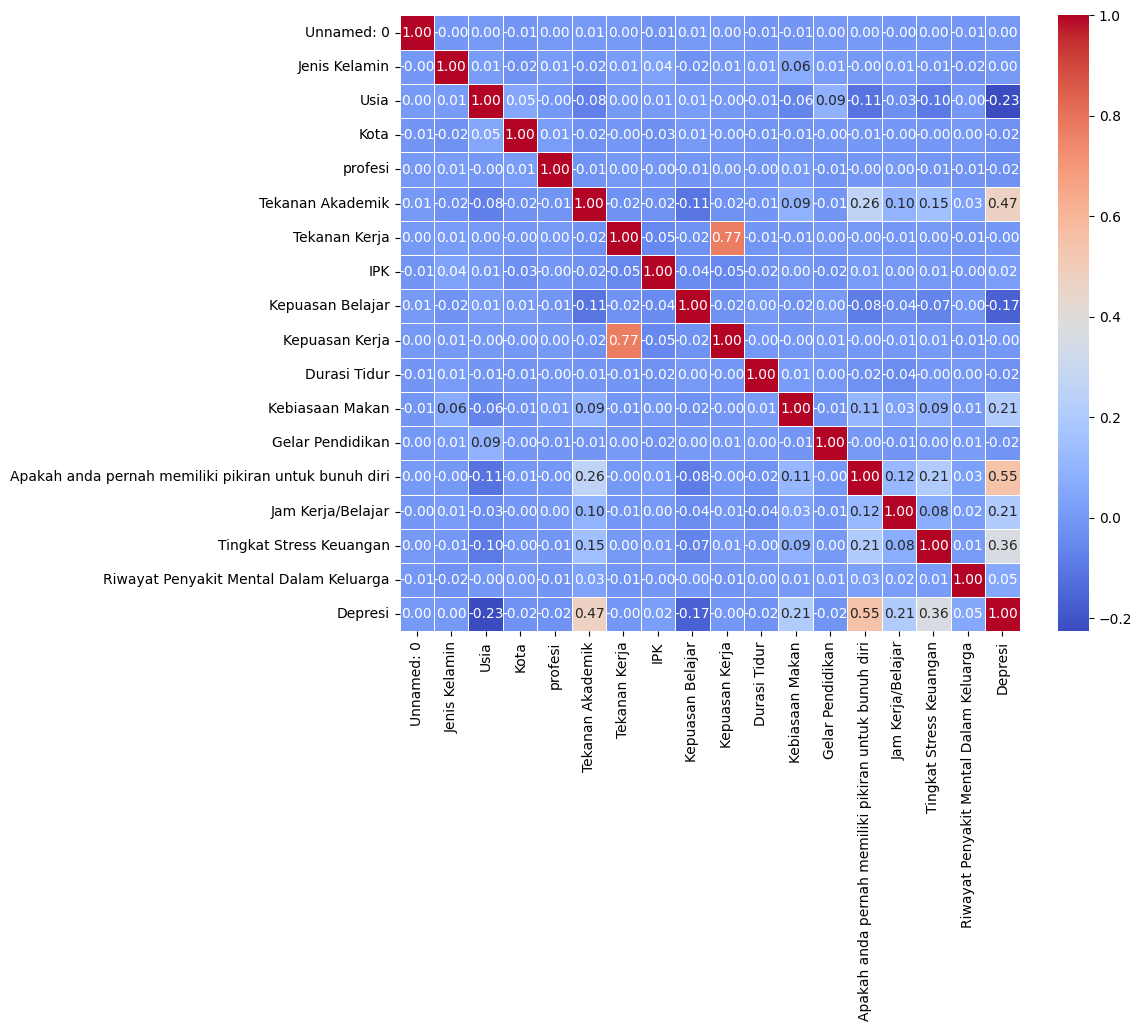

In [3]:
data = pd.read_csv('Data Numerical.csv')
df = pd.DataFrame(data)
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

In [28]:
# konversi file menjadi csv dengan nama Data Numerical
dn.to_csv('Data Numerical.csv')